In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.linear_model as linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
House_price_data = pd.read_csv("E:\Machine Learning\Kaggle Data Set\Delhi House Price Prediction\MagicBricks.csv")

In [3]:
House_price_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [4]:
# separate Numarical and Catagorical
# Then impute them
# One_hot encoding
# Scaling and sclicing
# ML Algo

In [5]:
House_price_data_copy = House_price_data.copy()
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [6]:
House_price_data_copy.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
House_price_data_copy.shape[0]

1259

In [8]:
House_price_data_copy.isnull().sum()/House_price_data_copy.shape[0]*100

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

In [9]:
House_price_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [10]:
House_price_data_copy.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [11]:
House_price_data_copy.groupby("Transaction").size()

Transaction
New_Property    478
Resale          781
dtype: int64

In [12]:
Num_var = House_price_data_copy.select_dtypes(include=['int64','float64'])
Num_var

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2.0,1.0,6500000,NaN
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.0
1255,1050.0,3,2.0,3.0,12500000,12916.0
1256,875.0,3,3.0,3.0,17500000,12916.0
1257,990.0,2,2.0,1.0,11500000,12916.0


In [13]:
Num_var.isnull().sum()

Area          0
BHK           0
Bathroom      2
Parking      33
Price         0
Per_Sqft    241
dtype: int64

In [14]:
mean_of_num_var = Num_var.fillna(Num_var.mean())

In [15]:
mean_of_num_var.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

In [16]:
per_of_num_miss = Num_var.isnull().mean()*100
per_of_num_miss

Area         0.000000
BHK          0.000000
Bathroom     0.158856
Parking      2.621128
Price        0.000000
Per_Sqft    19.142176
dtype: float64

In [17]:
miss_num_var = per_of_num_miss[per_of_num_miss>0]
miss_num_var

Bathroom     0.158856
Parking      2.621128
Per_Sqft    19.142176
dtype: float64

In [18]:
miss_num_var_col = pd.DataFrame(miss_num_var)
miss_num_var_col

,0
Bathroom,0.158856
Parking,2.621128
Per_Sqft,19.142176


In [19]:
miss_num_var_col_name = {"Bathroom","Parking","Per_Sqft"}
miss_num_var_col_name

{'Bathroom', 'Parking', 'Per_Sqft'}

In [20]:
median_of_num_var = Num_var.fillna(Num_var.median())

In [21]:
median_of_num_var.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

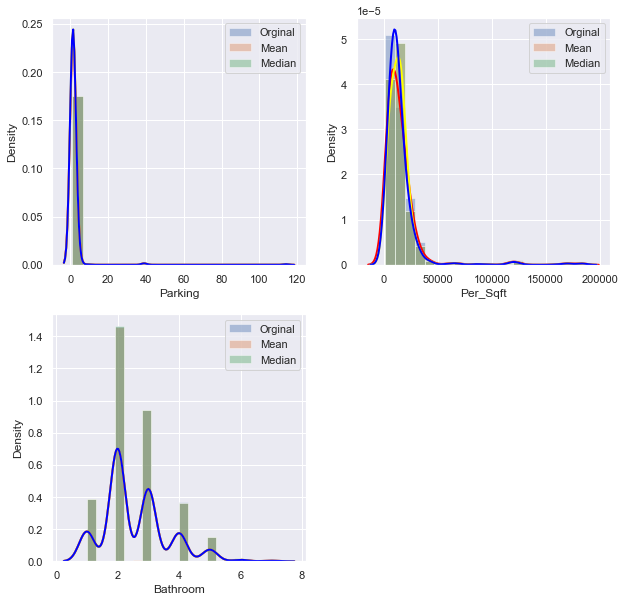

In [22]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(miss_num_var_col_name):
    plt.subplot(2,2,i+1)
    sns.distplot(Num_var[var],bins=20,kde_kws={"color": "red", "lw": 2},label= "Orginal",)
    sns.distplot(mean_of_num_var[var],bins=20,kde_kws={"color": "yellow", "lw": 2},label= "Mean",)
    sns.distplot(median_of_num_var[var],bins=20,kde_kws={"color": "Blue", "lw": 2},label= "Median",)
    plt.legend()

C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

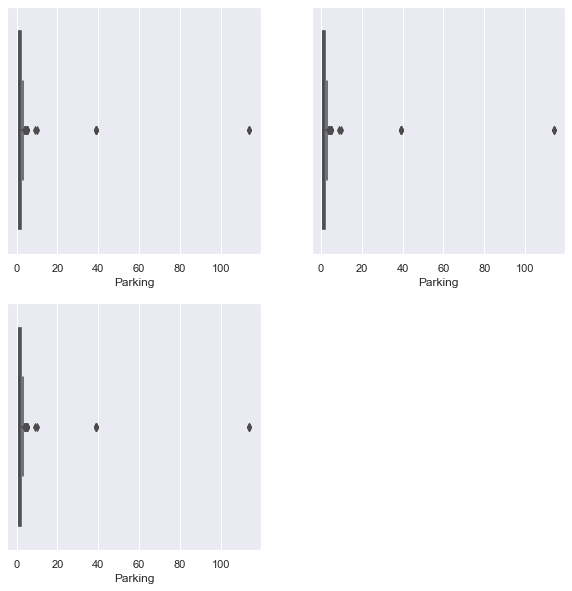

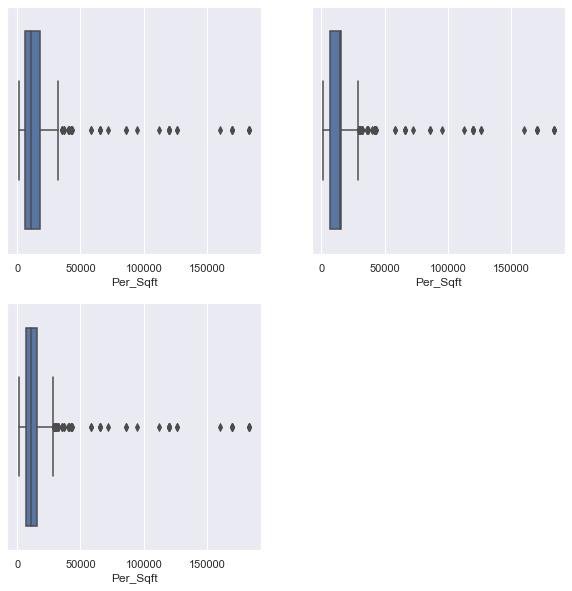

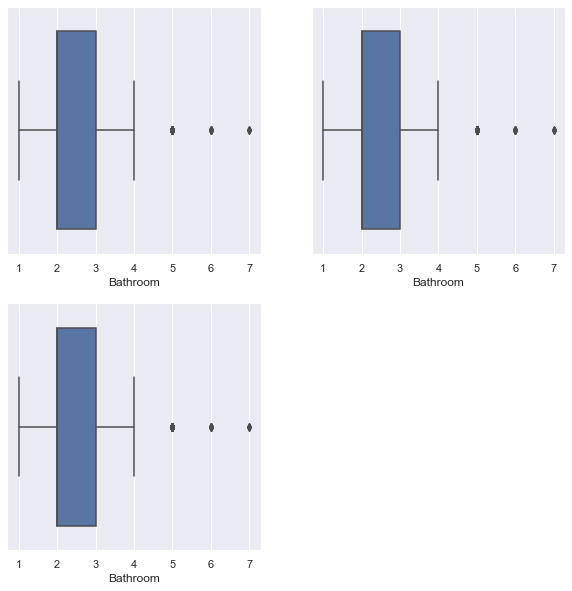

In [23]:
for i, var in enumerate(miss_num_var_col_name):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.boxplot(Num_var[var])
    plt.subplot(2,2,2)
    sns.boxplot(mean_of_num_var[var])
    plt.subplot(2,2,3)
    sns.boxplot(median_of_num_var[var])

In [24]:
cat_var = House_price_data_copy.select_dtypes(include=['object'])
cat_var

,Furnishing,Locality,Status,Transaction,Type
0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment
2,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment
3,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...
1254,Unfurnished,Chittaranjan Park,Ready_to_move,New_Property,Builder_Floor
1255,Semi-Furnished,Chittaranjan Park,Ready_to_move,Resale,Builder_Floor
1256,Semi-Furnished,Chittaranjan Park,Ready_to_move,New_Property,Builder_Floor
1257,Unfurnished,Chittaranjan Park Block A,Ready_to_move,Resale,Builder_Floor


In [25]:
cat_var.isnull().sum()

Furnishing     5
Locality       0
Status         0
Transaction    0
Type           5
dtype: int64

In [26]:
cat_var['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [27]:
mode_name_of_cat_var_1 = cat_var['Furnishing'].mode()
mode_name_of_cat_var_1

0    Semi-Furnished
dtype: object

In [28]:
mode_of_cat_var_1 = cat_var['Furnishing'].fillna('Semi-Furnished', inplace=True)

C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [29]:
cat_var.isnull().sum()

Furnishing     0
Locality       0
Status         0
Transaction    0
Type           5
dtype: int64

In [30]:
cat_var['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

In [31]:
mode_name_of_cat_var_2 = cat_var['Type'].mode()
mode_name_of_cat_var_2

0    Builder_Floor
dtype: object

In [32]:
mode_of_cat_var_2 = cat_var['Type'].fillna('Builder_Floor', inplace=True)
mode_of_cat_var_2

In [33]:
cat_var.isnull().sum()

Furnishing     0
Locality       0
Status         0
Transaction    0
Type           0
dtype: int64

In [34]:
Num_var.fillna(Num_var.mean(), inplace=True)

In [35]:
House_price_data_copy.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [36]:
mean_of_num_var.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

In [37]:
Num_var.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

In [38]:
House_price_data_copy.update(Num_var)

In [39]:
House_price_data_copy.update(cat_var)

In [40]:
House_price_data_copy.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [41]:
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000


<AxesSubplot:>

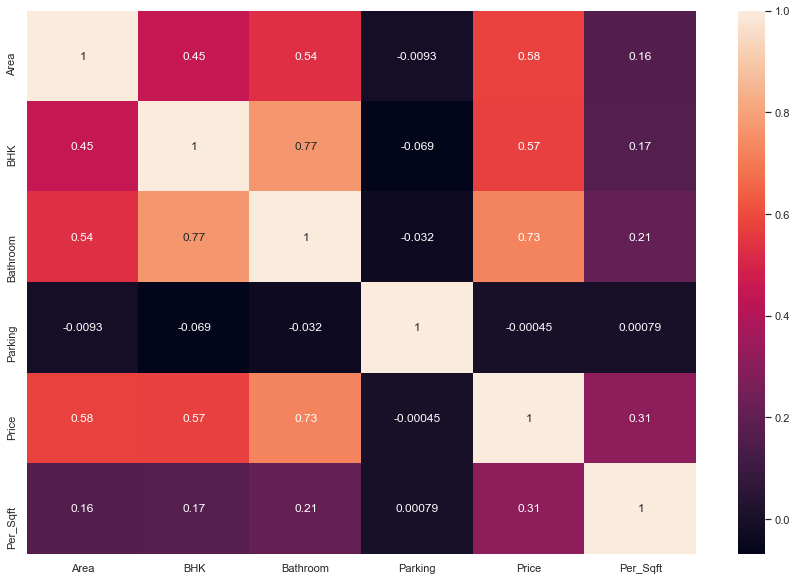

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(House_price_data_copy.corr(), annot=True)

In [43]:
dummy_var = pd.get_dummies(House_price_data_copy, drop_first=True)
dummy_var

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_Aashirwaad Chowk, Dwarka","Locality_Abhimanyu Apartments, Vasundhara Enclave",...,"Locality_Vinoba Puri, Lajpat Nagar","Locality_Virat Residency, Dwarka Mor","Locality_Vishwas Nagar, Shahdara","Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,3,2.0,1.0,6500000,15690.136542,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,750.0,2,2.0,1.0,5000000,6667.000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,950.0,2,2.0,1.0,15500000,6667.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,600.0,2,2.0,1.0,4200000,6667.000000,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,650.0,2,2.0,1.0,6200000,6667.000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.000000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1255,1050.0,3,2.0,3.0,12500000,12916.000000,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1256,875.0,3,3.0,3.0,17500000,12916.000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1257,990.0,2,2.0,1.0,11500000,12916.000000,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [44]:
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000


In [45]:
lE = LabelEncoder()

In [46]:
#House_price_data_2 = House_price_data[['Furnishing','Status','Transaction','Type']]
#House_price_data_2

In [47]:
#House_price_data_2['Furnishing'].value_counts()

In [48]:
House_price_data_copy['Furnishing'].value_counts()

Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [49]:
order_Label_fer = {"Semi-Furnished":2, "Unfurnished":1, "Furnished":3,}

In [50]:
House_price_data_copy["Furnishing_org_LE"] = House_price_data_copy["Furnishing"].map(order_Label_fer)
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Furnishing_org_LE
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542,2
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000,2
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000,3
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000,2
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000,1
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000,2
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000,2
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000,1


In [51]:
House_price_data_copy['Status'].value_counts()

Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64

In [52]:
order_Label_sta = {"Ready_to_move":2, "Almost_ready":1}

In [53]:
House_price_data_copy["Status_org_LE"] = House_price_data_copy["Status"].map(order_Label_sta)
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Furnishing_org_LE,Status_org_LE
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542,2,2
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000,2,2
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000,3,2
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000,2,2
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000,1,2
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000,2,2
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000,2,2
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000,1,2


In [54]:
House_price_data_copy['Transaction'].value_counts()

Resale          781
New_Property    478
Name: Transaction, dtype: int64

In [55]:
order_Label_tra = {"New_Property":2, "Resale":1}
House_price_data_copy["Transaction_org_LE"] = House_price_data_copy["Transaction"].map(order_Label_tra)
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542,2,2,2
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000,2,2,2
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000,3,2,1
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000,2,2,1
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000,1,2,2
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000,2,2,1
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000,2,2,2
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000,1,2,1


In [56]:
House_price_data_copy['Type'].value_counts()

Builder_Floor    666
Apartment        593
Name: Type, dtype: int64

In [57]:
order_Label_ty = {"Builder_Floor":2, "Apartment":1}
House_price_data_copy["Type_org_LE"] = House_price_data_copy["Type"].map(order_Label_ty)
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542,2,2,2,2
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000,2,2,2,1
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000,3,2,1,1
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000,2,2,1,2
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000,1,2,2,2
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000,2,2,1,2
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000,2,2,2,2
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000,1,2,1,2


In [58]:
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542,2,2,2,2
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000,2,2,2,1
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000,3,2,1,1
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000,2,2,1,2
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000,1,2,2,2
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000,2,2,1,2
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000,2,2,2,2
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000,1,2,1,2


In [59]:
House_price_data_copy.drop(columns={"Locality", "Status", "Transaction", "Type"}, inplace= True)
House_price_data_copy

,Area,BHK,Bathroom,Furnishing,Parking,Price,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,15690.136542,2,2,2,2
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,6667.000000,2,2,2,1
2,950.0,2,2.0,Furnished,1.0,15500000,6667.000000,3,2,1,1
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,6667.000000,2,2,1,2
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,6667.000000,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,12916.000000,1,2,2,2
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,12916.000000,2,2,1,2
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,12916.000000,2,2,2,2
1257,990.0,2,2.0,Unfurnished,1.0,11500000,12916.000000,1,2,1,2


In [60]:
House_price_data_copy.drop(columns="Furnishing", inplace= True)
House_price_data_copy

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,800.0,3,2.0,1.0,6500000,15690.136542,2,2,2,2
1,750.0,2,2.0,1.0,5000000,6667.000000,2,2,2,1
2,950.0,2,2.0,1.0,15500000,6667.000000,3,2,1,1
3,600.0,2,2.0,1.0,4200000,6667.000000,2,2,1,2
4,650.0,2,2.0,1.0,6200000,6667.000000,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.000000,1,2,2,2
1255,1050.0,3,2.0,3.0,12500000,12916.000000,2,2,1,2
1256,875.0,3,3.0,3.0,17500000,12916.000000,2,2,2,2
1257,990.0,2,2.0,1.0,11500000,12916.000000,1,2,1,2


In [61]:
House_price_data_copy_again = House_price_data_copy.copy()
House_price_data_copy_again

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,800.0,3,2.0,1.0,6500000,15690.136542,2,2,2,2
1,750.0,2,2.0,1.0,5000000,6667.000000,2,2,2,1
2,950.0,2,2.0,1.0,15500000,6667.000000,3,2,1,1
3,600.0,2,2.0,1.0,4200000,6667.000000,2,2,1,2
4,650.0,2,2.0,1.0,6200000,6667.000000,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.000000,1,2,2,2
1255,1050.0,3,2.0,3.0,12500000,12916.000000,2,2,1,2
1256,875.0,3,3.0,3.0,17500000,12916.000000,2,2,2,2
1257,990.0,2,2.0,1.0,11500000,12916.000000,1,2,1,2


In [62]:
x = House_price_data_copy_again.drop(columns= "Price")
y = House_price_data_copy_again["Price"]
print("the shape of x is", x.shape)
print("the shape of y is", y.shape)

the shape of x is (1259, 9)
the shape of y is (1259,)


In [63]:
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1007, 9)
Shape of y_train =  (1007,)
Shape of X_test =  (252, 9)
Shape of y_test =  (252,)


In [64]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [65]:
sc.scale_

array([1.52040416e+03, 9.30529515e-01, 1.03054305e+00, 5.70718312e+00,
       1.91724592e+04, 6.40523314e-01, 2.34855483e-01, 4.83442361e-01,
       4.99407715e-01])

In [66]:
X_train.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1446.136589,2.788481,2.542316,1.861969,15938.551855,1.846077,1.941410,1.372393,1.524330
std,1521.159643,0.930992,1.031055,5.710019,19181.985883,0.640842,0.234972,0.483683,0.499656
min,28.000000,1.000000,1.000000,1.000000,1259.000000,1.000000,1.000000,1.000000,1.000000
25%,800.000000,2.000000,2.000000,1.000000,6878.000000,1.000000,2.000000,1.000000,1.000000
50%,1184.000000,3.000000,2.000000,1.000000,14815.000000,2.000000,2.000000,1.000000,2.000000
75%,1650.000000,3.000000,3.000000,2.000000,15690.136542,2.000000,2.000000,2.000000,2.000000
max,22050.000000,10.000000,7.000000,114.000000,183333.000000,3.000000,2.000000,2.000000,2.000000


In [67]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [68]:
X_train_sc

array([[-0.16188892,  0.22731075,  0.44411928, ...,  0.24947202,
         1.29820389,  0.95246888],
       [-0.50719184, -0.84734619, -0.5262429 , ...,  0.24947202,
        -0.77029503,  0.95246888],
       [-0.55652083, -0.84734619, -0.5262429 , ...,  0.24947202,
        -0.77029503,  0.95246888],
       ...,
       [ 0.6273749 ,  1.30196769,  1.41448146, ...,  0.24947202,
         1.29820389, -1.04990307],
       [ 4.31060607,  1.30196769,  2.38484364, ...,  0.24947202,
         1.29820389,  0.95246888],
       [ 0.36428696,  1.30196769,  1.41448146, ..., -4.00846562,
         1.29820389, -1.04990307]])

In [69]:
X_train_sc = pd.DataFrame(X_train_sc, columns = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Furnishing_org_LE', 'Status_org_LE', 'Transaction_org_LE', 'Type_org_LE'])
X_test_sc = pd.DataFrame(X_test_sc, columns = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Furnishing_org_LE', 'Status_org_LE', 'Transaction_org_LE', 'Type_org_LE'])

In [70]:
X_train_sc

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,-0.161889,0.227311,0.444119,-0.151032,0.124890,0.240307,0.249472,1.298204,0.952469
1,-0.507192,-0.847346,-0.526243,-0.151032,-0.058602,0.240307,0.249472,-0.770295,0.952469
2,-0.556521,-0.847346,-0.526243,-0.151032,-0.553166,-1.320916,0.249472,-0.770295,0.952469
3,-0.589407,-0.847346,-0.526243,0.024186,-0.054795,0.240307,0.249472,-0.770295,0.952469
4,-0.390775,-0.847346,-0.526243,-0.151032,-0.483587,-1.320916,0.249472,-0.770295,-1.049903
...,...,...,...,...,...,...,...,...,...
1002,-0.523635,-0.847346,-0.526243,-0.151032,-0.012957,-1.320916,0.249472,-0.770295,0.952469
1003,-0.885381,0.227311,-0.526243,-0.151032,-0.483587,-1.320916,0.249472,-0.770295,0.952469
1004,0.627375,1.301968,1.414481,-0.151032,-0.714752,0.240307,0.249472,1.298204,-1.049903
1005,4.310606,1.301968,2.384844,-0.151032,0.316154,0.240307,0.249472,1.298204,0.952469


In [71]:
X_train_sc.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
count,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03
mean,-1.105813e-16,2.121221e-16,-2.359362e-16,6.863097e-17,-3.013974e-17,2.430473e-16,2.646013e-18,9.702048e-18,1.459717e-16
std,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00
min,-9.327366e-01,-1.922003e+00,-1.496605e+00,-1.510322e-01,-7.656583e-01,-1.320916e+00,-4.008466e+00,-7.702950e-01,-1.049903e+00
25%,-4.249769e-01,-8.473462e-01,-5.262429e-01,-1.510322e-01,-4.725816e-01,-1.320916e+00,2.494720e-01,-7.702950e-01,-1.049903e+00
50%,-1.724124e-01,2.273108e-01,-5.262429e-01,-1.510322e-01,-5.860239e-02,2.403075e-01,2.494720e-01,-7.702950e-01,9.524689e-01
75%,1.340850e-01,2.273108e-01,4.441193e-01,2.418554e-02,-1.295688e-02,2.403075e-01,2.494720e-01,1.298204e+00,9.524689e-01
max,1.355157e+01,7.749909e+00,4.325568e+00,1.964858e+01,8.730985e+00,1.801531e+00,2.494720e-01,1.298204e+00,9.524689e-01


In [72]:
X_train_sc.describe().round(2)

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
count,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.93,-1.92,-1.50,-0.15,-0.77,-1.32,-4.01,-0.77,-1.05
25%,-0.42,-0.85,-0.53,-0.15,-0.47,-1.32,0.25,-0.77,-1.05
50%,-0.17,0.23,-0.53,-0.15,-0.06,0.24,0.25,-0.77,0.95
75%,0.13,0.23,0.44,0.02,-0.01,0.24,0.25,1.30,0.95
max,13.55,7.75,4.33,19.65,8.73,1.80,0.25,1.30,0.95


In [73]:
mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [74]:
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

In [75]:
X_train_mms

array([[0.05321951, 0.22222222, 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [0.02937971, 0.11111111, 0.16666667, ..., 1.        , 0.        ,
        1.        ],
       [0.02597403, 0.11111111, 0.16666667, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.10771047, 0.33333333, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.36200163, 0.33333333, 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.08954682, 0.33333333, 0.5       , ..., 0.        , 1.        ,
        0.        ]])

In [76]:
X_train_mms = pd.DataFrame(X_train_mms, columns = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Furnishing_org_LE', 'Status_org_LE', 'Transaction_org_LE', 'Type_org_LE'])
X_test_mms = pd.DataFrame(X_test_mms, columns = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Furnishing_org_LE', 'Status_org_LE', 'Transaction_org_LE', 'Type_org_LE'])

In [77]:
X_train_mms.describe().round(2)

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
count,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00
mean,0.06,0.20,0.26,0.01,0.08,0.42,0.94,0.37,0.52
std,0.07,0.10,0.17,0.05,0.11,0.32,0.23,0.48,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.04,0.11,0.17,0.00,0.03,0.00,1.00,0.00,0.00
50%,0.05,0.22,0.17,0.00,0.07,0.50,1.00,0.00,1.00
75%,0.07,0.22,0.33,0.01,0.08,0.50,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


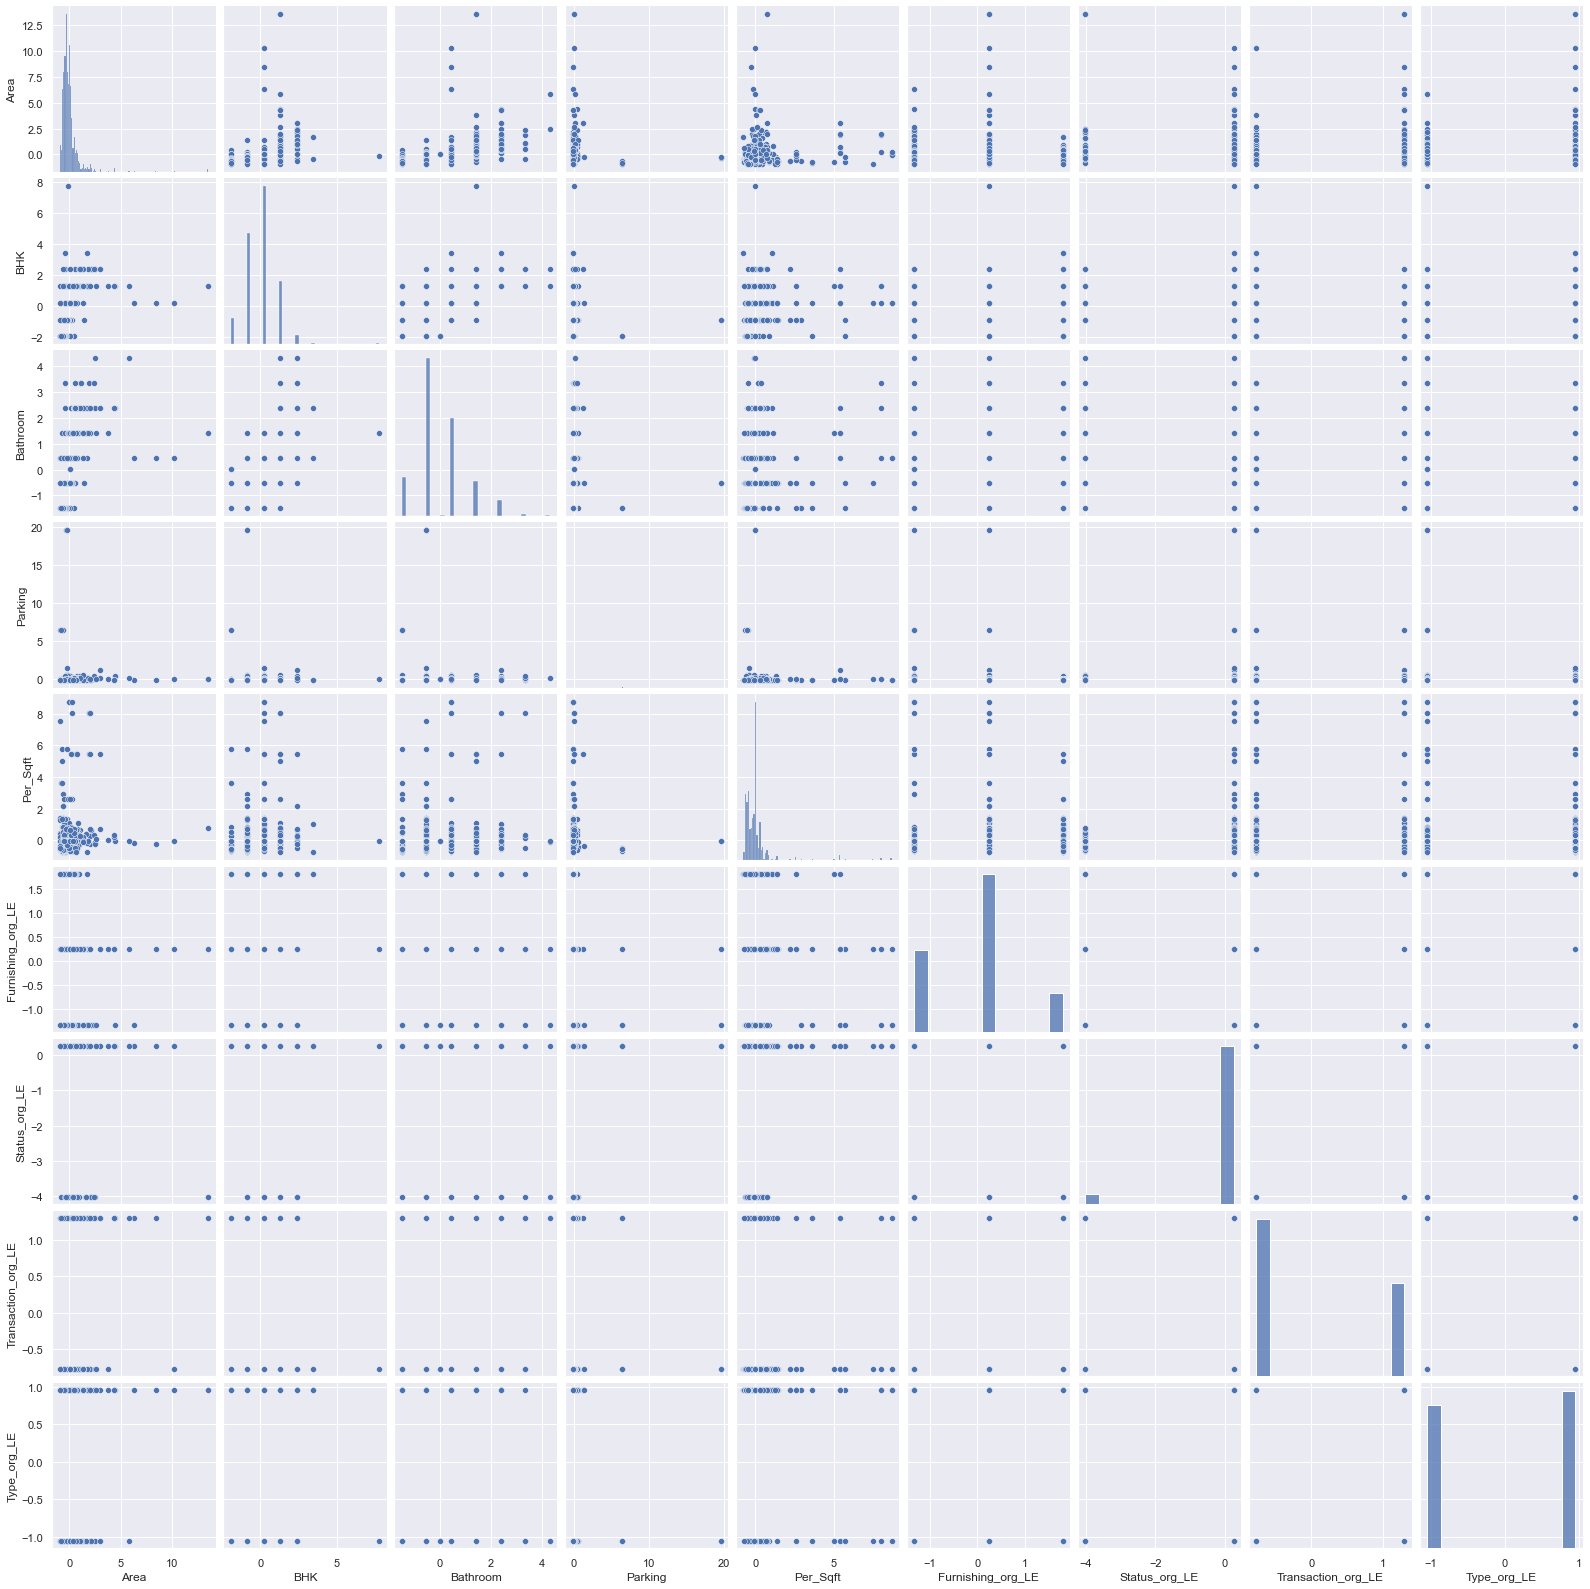

In [78]:
sns.pairplot(X_train_sc)

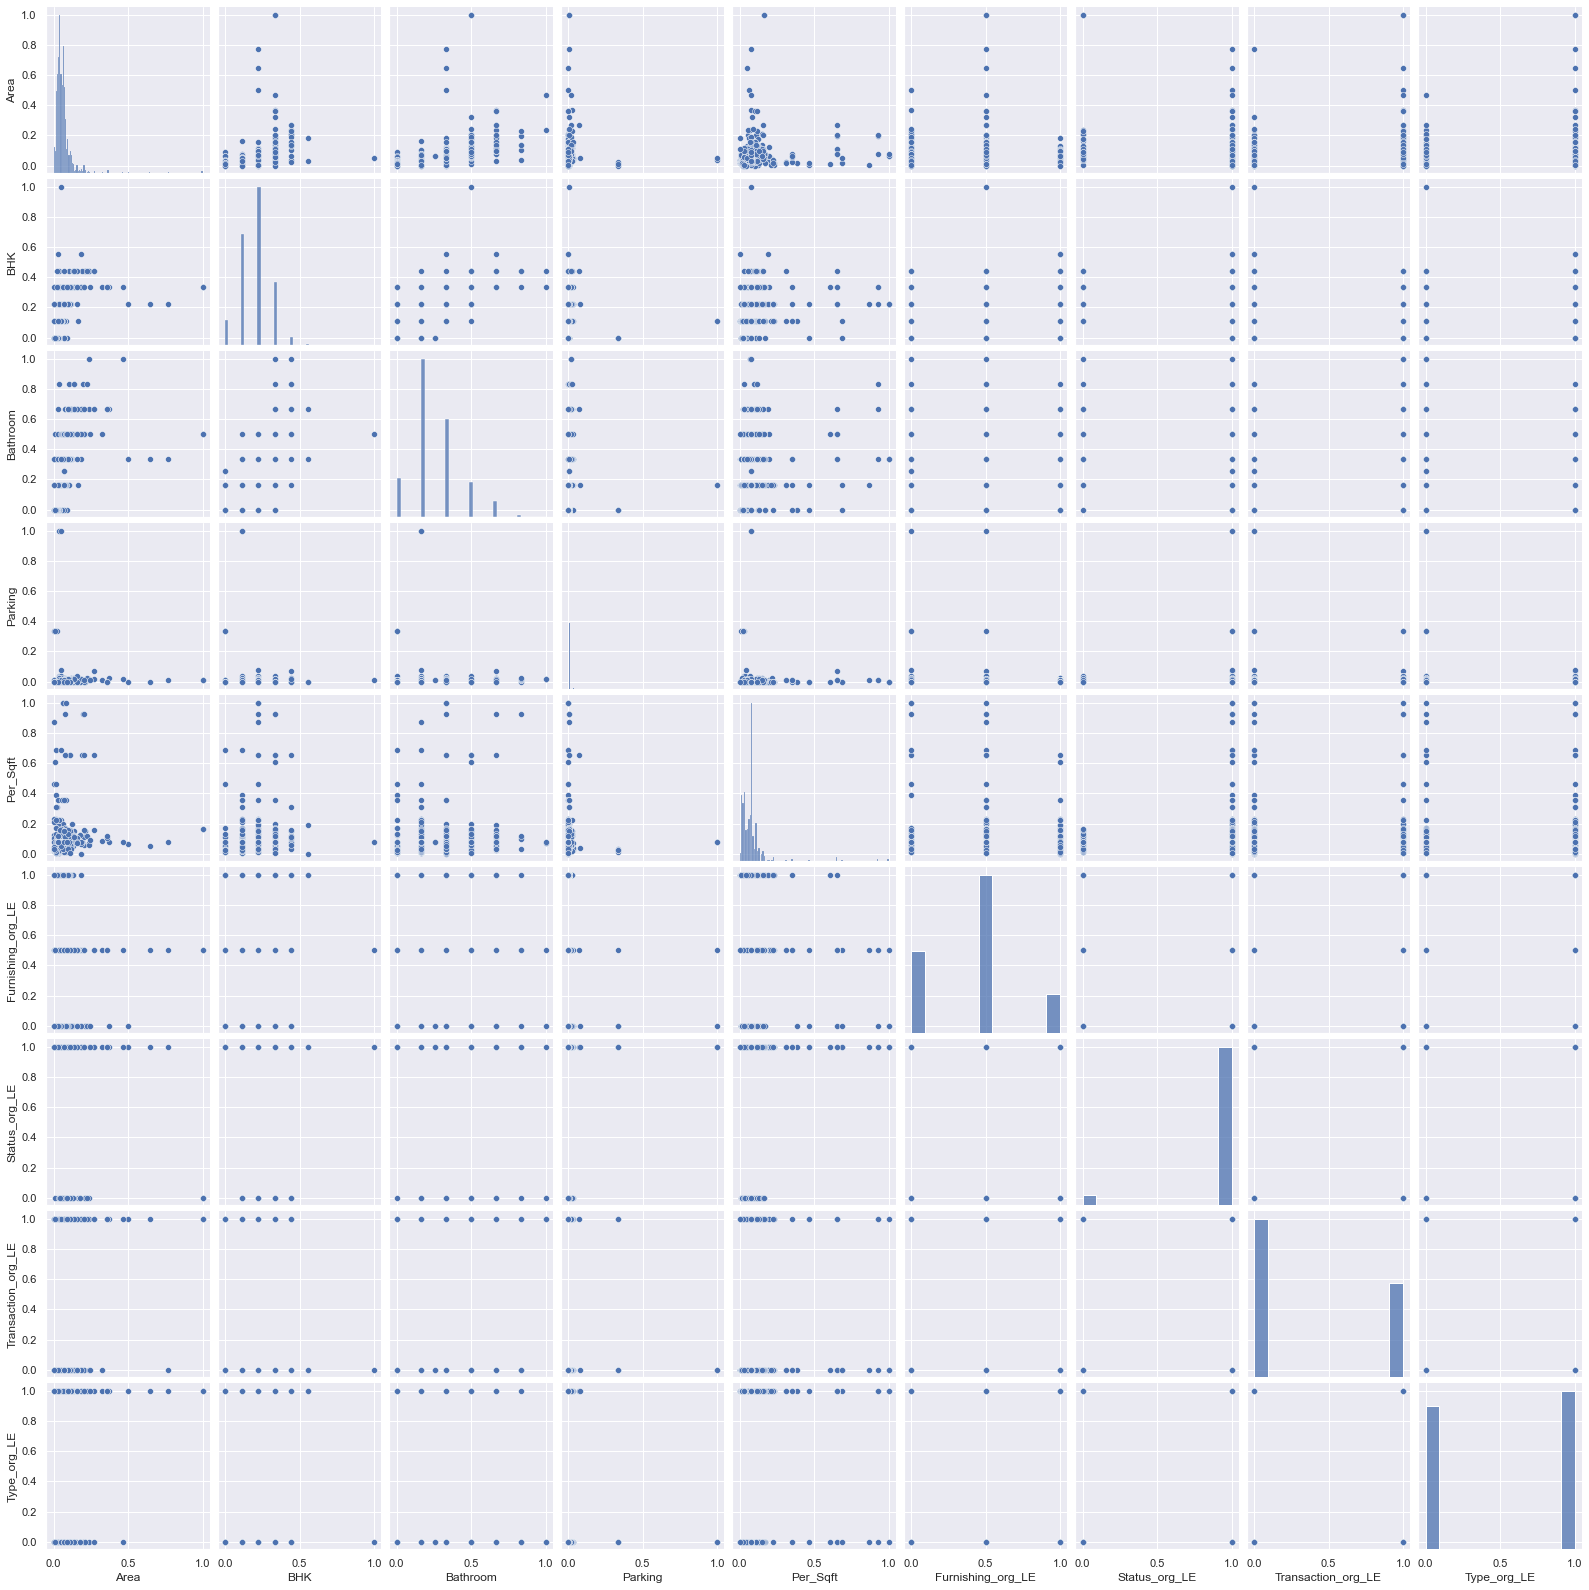

In [79]:
sns.pairplot(X_train_mms)

In [80]:
X_train_sc

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,-0.161889,0.227311,0.444119,-0.151032,0.124890,0.240307,0.249472,1.298204,0.952469
1,-0.507192,-0.847346,-0.526243,-0.151032,-0.058602,0.240307,0.249472,-0.770295,0.952469
2,-0.556521,-0.847346,-0.526243,-0.151032,-0.553166,-1.320916,0.249472,-0.770295,0.952469
3,-0.589407,-0.847346,-0.526243,0.024186,-0.054795,0.240307,0.249472,-0.770295,0.952469
4,-0.390775,-0.847346,-0.526243,-0.151032,-0.483587,-1.320916,0.249472,-0.770295,-1.049903
...,...,...,...,...,...,...,...,...,...
1002,-0.523635,-0.847346,-0.526243,-0.151032,-0.012957,-1.320916,0.249472,-0.770295,0.952469
1003,-0.885381,0.227311,-0.526243,-0.151032,-0.483587,-1.320916,0.249472,-0.770295,0.952469
1004,0.627375,1.301968,1.414481,-0.151032,-0.714752,0.240307,0.249472,1.298204,-1.049903
1005,4.310606,1.301968,2.384844,-0.151032,0.316154,0.240307,0.249472,1.298204,0.952469


In [81]:
X_train.update(X_train_sc)

C:\Users\Muhammad Shakil\anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [82]:
X_train

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
1238,1200.000000,3.000000,3.000000,1.000000,18333.000000,2.000000,2.000000,2.000000,2.000000
1034,675.000000,2.000000,2.000000,1.000000,14815.000000,2.000000,2.000000,1.000000,2.000000
838,1.350867,2.376625,2.384844,-0.151032,0.211838,0.240307,0.249472,1.298204,0.952469
910,0.242609,0.227311,0.444119,0.024186,0.102618,0.240307,0.249472,-0.770295,-1.049903
534,0.166971,1.301968,0.444119,-0.151032,-0.647520,-1.320916,0.249472,-0.770295,-1.049903
...,...,...,...,...,...,...,...,...,...
933,-0.319742,-0.847346,-0.526243,0.024186,-0.063453,0.240307,0.249472,-0.770295,-1.049903
528,-0.507192,-0.847346,-1.496605,-0.151032,-0.490941,-1.320916,0.249472,-0.770295,-1.049903
485,-0.161889,0.227311,-0.526243,-0.151032,-0.012957,0.240307,0.249472,-0.770295,-1.049903
57,-0.326319,0.227311,-0.526243,-0.151032,-0.591398,1.801531,0.249472,1.298204,-1.049903


In [83]:
X_train.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,330.961429,0.575660,0.559755,0.303222,3715.461340,0.334544,0.402162,0.255801,0.269998
std,965.454063,1.503551,1.514374,1.025149,12805.362937,1.165043,1.162431,1.058720,1.108758
min,-0.928133,-1.922003,-1.496605,-0.151032,-0.744378,-1.320916,-4.008466,-0.770295,-1.049903
25%,-0.359205,-0.847346,-0.526243,-0.151032,-0.410931,0.240307,0.249472,-0.770295,-1.049903
50%,-0.030345,0.227311,0.444119,-0.151032,-0.012957,0.240307,0.249472,-0.770295,0.952469
75%,0.956235,1.301968,1.414481,0.199403,0.733419,1.000000,0.249472,1.298204,0.952469
max,17010.000000,7.749909,7.000000,19.648578,170000.000000,3.000000,2.000000,2.000000,2.000000


In [84]:
X_train_sc

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_org_LE,Status_org_LE,Transaction_org_LE,Type_org_LE
0,-0.161889,0.227311,0.444119,-0.151032,0.124890,0.240307,0.249472,1.298204,0.952469
1,-0.507192,-0.847346,-0.526243,-0.151032,-0.058602,0.240307,0.249472,-0.770295,0.952469
2,-0.556521,-0.847346,-0.526243,-0.151032,-0.553166,-1.320916,0.249472,-0.770295,0.952469
3,-0.589407,-0.847346,-0.526243,0.024186,-0.054795,0.240307,0.249472,-0.770295,0.952469
4,-0.390775,-0.847346,-0.526243,-0.151032,-0.483587,-1.320916,0.249472,-0.770295,-1.049903
...,...,...,...,...,...,...,...,...,...
1002,-0.523635,-0.847346,-0.526243,-0.151032,-0.012957,-1.320916,0.249472,-0.770295,0.952469
1003,-0.885381,0.227311,-0.526243,-0.151032,-0.483587,-1.320916,0.249472,-0.770295,0.952469
1004,0.627375,1.301968,1.414481,-0.151032,-0.714752,0.240307,0.249472,1.298204,-1.049903
1005,4.310606,1.301968,2.384844,-0.151032,0.316154,0.240307,0.249472,1.298204,0.952469


## Cross_Validation

In [85]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [86]:
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## LinearRegression

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
# y_pred_LR = lr.predict(X_test)
# accuracy_score(y_test, y_pred_LR)

In [90]:
# dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
# dt_model.fit(X_train, y_train)
# y_pred_dt = dt_model.predict(X_test)
# accuracy_score(y_test, y_pred_dt)

In [91]:
lr.coef_

array([ 4.80906734e+03, -2.15010899e+06,  3.01687718e+06,  1.14350521e+05,
        1.26311425e+02, -8.01588411e+05, -1.40322864e+06,  6.76605608e+05,
       -4.10610482e+05])

In [92]:
lr.predict(X_test)

array([2.80984025e+07, 2.14003332e+07, 2.54121018e+07, 3.52783046e+07,
       4.02188087e+07, 2.08079767e+07, 2.38895273e+07, 1.97182450e+07,
       2.66765301e+07, 2.83816833e+07, 2.29967029e+07, 2.75585615e+07,
       2.28221617e+07, 2.71105384e+07, 4.54121240e+07, 7.56814957e+07,
       1.96528090e+07, 3.71765724e+07, 3.49464926e+07, 1.76948706e+07,
       2.10249630e+07, 2.15133230e+07, 2.08564816e+07, 1.90686405e+07,
       2.07461511e+07, 2.19023395e+07, 1.97606269e+07, 2.31710864e+07,
       2.34436007e+07, 2.55146942e+07, 2.40379922e+07, 2.08297516e+07,
       2.11109063e+07, 2.39684040e+07, 2.35139562e+07, 2.02137337e+07,
       2.17669106e+07, 2.32556487e+07, 1.96409889e+07, 3.18833582e+07,
       2.01450591e+07, 2.69259393e+07, 3.01427319e+07, 3.44179015e+07,
       2.75311924e+07, 3.21037826e+07, 3.48629835e+07, 2.49327680e+07,
       2.49754053e+07, 2.82188034e+07, 2.48138263e+07, 3.24467539e+07,
       2.91540025e+07, 1.87829244e+07, 2.20197500e+07, 3.50065529e+07,
      

In [93]:
y_test

1243    35000000
819      5600000
143     25000000
542     75000000
546     75000000
          ...   
238      5500000
953      2600000
1233    47500000
835      1650000
329      6000000
Name: Price, Length: 252, dtype: int64

In [94]:
lr.score(X_test, y_test)

0.34224355058911193

In [95]:
lr.fit(X_train_sc, y_train)
lr.predict(X_test_sc)

array([ 2.90367085e+07,  1.29042598e+07,  2.61210285e+07,  4.98177760e+07,
        6.40410908e+07,  8.86818659e+06,  1.25222429e+07, -9.93725748e+05,
        2.52681027e+07,  1.97222108e+07,  9.10158141e+06,  2.93079408e+07,
        1.11392384e+07,  3.85895561e+07,  5.32550508e+07,  1.07385746e+08,
        8.58292400e+06,  2.21098142e+07,  5.15187096e+07, -5.73482430e+06,
        6.75413672e+06,  1.44349168e+07,  1.00465538e+07, -7.95531664e+06,
        6.46562010e+06,  1.13446493e+07,  1.31182227e+07,  1.25067985e+07,
       -3.94697182e+06,  2.41454111e+07,  1.79406899e+07,  6.29279376e+06,
        1.36957698e+07,  9.74787771e+06, -3.84636288e+06,  5.85059510e+06,
        1.13095672e+07,  9.24578623e+06,  8.75416828e+06,  4.29963271e+07,
        1.17073207e+07,  2.81192717e+07,  2.94426488e+07,  4.82334096e+07,
        2.62812249e+07,  4.26819836e+07,  3.85973710e+07,  1.10880186e+07,
        1.53606800e+07,  3.90245971e+07,  1.10224570e+07,  4.02968379e+07,
        3.07454319e+07, -

In [96]:
y_test

1243    35000000
819      5600000
143     25000000
542     75000000
546     75000000
          ...   
238      5500000
953      2600000
1233    47500000
835      1650000
329      6000000
Name: Price, Length: 252, dtype: int64

In [97]:
lr.score(X_test_sc, y_test)

0.6147353786016956

## Ridge and Lasso Regression

In [98]:
rdg = linear_model.Ridge()
test_model(rdg)

[-0.08348289926785502]

In [99]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[-0.0836289420315736]

In [100]:
lr.score(X_test_sc, y_test)

0.6147353786016956

## Polynomial Regression

In [101]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train_sc)
X_train_poly = poly_reg.transform(X_train_sc)
X_test_poly = poly_reg.transform(X_test_sc)

In [102]:
lr.fit(X_train_poly, y_train)

LinearRegression()

In [103]:
lr.predict(X_test_poly)

array([ 2.10278000e+07,  8.23336800e+06,  2.11117680e+07,  6.29583280e+07,
        7.77056880e+07,  3.36972000e+06,  9.79168000e+06,  3.53677600e+06,
        2.04534480e+07,  3.61664240e+07,  1.11222160e+07,  2.43291040e+07,
        7.38213600e+06,  2.40492640e+07,  8.54940640e+07,  1.29869208e+08,
        4.53941600e+06,  1.23712480e+07,  5.96971280e+07,  8.38040000e+05,
        4.02604000e+06, -4.10920000e+05,  1.52343120e+07,  1.94885600e+06,
        5.05147200e+06,  1.32517760e+07,  2.55680000e+05,  1.50020080e+07,
       -2.98804000e+06,  1.97816400e+07,  1.05118320e+07,  7.57145600e+06,
        2.01808800e+07,  1.45644400e+07, -1.36356000e+06,  3.75700800e+06,
        1.18607200e+07,  1.45565680e+07,  4.48280800e+06,  4.84161680e+07,
        8.09101600e+06,  2.53532480e+07,  2.65139600e+07,  5.99082960e+07,
        2.30618480e+07,  3.79424560e+07,  5.43948080e+07,  9.82514400e+06,
        9.96959200e+06,  2.57805040e+07,  1.00781760e+07,  3.82934240e+07,
        3.58886720e+07,  

In [104]:
lr.score(X_test_poly, y_test)

0.7868896826068563

## Support Vactor Regression

In [105]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_sc, y_train)
svr_rbf.score(X_test_sc, y_test)

-0.11353937020252647

In [106]:
svr_rbf_2 = SVR(kernel='rbf')
svr_rbf_2.fit(X_train, y_train)
svr_rbf_2.score(X_test, y_test)

-0.11353756746890031

In [107]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_sc, y_train)
svr_linear.score(X_test_sc, y_test)

-0.11348582097151572

In [108]:
svr_poly = SVR(kernel='poly', degree=1)
svr_poly.fit(X_train_sc, y_train)
svr_poly.score(X_test_sc, y_test)

-0.11353454735679014

In [109]:
svr_poly_2 = SVR(kernel='poly', degree=1)
svr_poly_2.fit(X_train, y_train)
svr_poly_2.score(X_test, y_test)

-0.11352933623071748

## K Nearest Neighbor Regression

In [110]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_sc, y_train)
KNN.score(X_test_sc, y_test)

0.728000684719831

In [111]:
KNN_2 = KNeighborsRegressor(n_neighbors=5)
KNN_2.fit(X_train, y_train)
KNN_2.score(X_test, y_test)

0.4416553353104987

## Decision Tree Regression

In [112]:
DT = DecisionTreeRegressor(criterion='mse')
DT.fit(X_train_sc, y_train)
DT.score(X_test_sc, y_test)

0.45907835929775587

In [113]:
DT_2 = DecisionTreeRegressor(criterion='friedman_mse')
DT_2.fit(X_train_sc, y_train)
DT_2.score(X_test_sc, y_test)

0.45551231145297577

In [114]:
DT_3 = DecisionTreeRegressor(criterion='mae')
DT_3.fit(X_train_sc, y_train)
DT_3.score(X_test_sc, y_test)

0.7774247687986813

##  Random Forest Regression

In [115]:
RFR = RandomForestRegressor(n_estimators=100, criterion='mse')
RFR.fit(X_train_sc, y_train)
RFR.score(X_test_sc, y_test)

0.8107838683096156

In [116]:
RFR_2 = RandomForestRegressor(n_estimators=100, criterion='mae')
RFR_2.fit(X_train_sc, y_train)
RFR_2.score(X_test_sc, y_test)

0.826169861052267

## Predict 

In [117]:
y_pred = RFR_2.predict(X_test_sc)
y_pred

array([2.72529e+07, 5.96050e+06, 2.24175e+07, 6.84250e+07, 7.33800e+07,
       2.97100e+06, 1.04206e+07, 6.58640e+06, 2.00200e+07, 2.25580e+07,
       8.84580e+06, 2.44290e+07, 1.28078e+07, 1.76430e+07, 9.38600e+07,
       1.54462e+08, 7.78000e+06, 1.16100e+07, 5.69810e+07, 3.58600e+06,
       2.29700e+06, 5.41965e+06, 1.21599e+07, 2.20650e+06, 3.19750e+06,
       1.40028e+07, 1.42961e+07, 2.30660e+07, 1.92000e+06, 2.25804e+07,
       1.02664e+07, 5.01200e+06, 1.62520e+07, 1.39085e+07, 2.05950e+06,
       2.88790e+06, 9.46550e+06, 1.68706e+07, 7.63840e+06, 5.24670e+07,
       7.19800e+06, 3.63830e+07, 3.16350e+07, 6.02540e+07, 2.00745e+07,
       4.52260e+07, 5.41755e+07, 1.48185e+07, 1.07938e+07, 2.90320e+07,
       1.57950e+07, 3.71700e+07, 3.33570e+07, 1.70280e+06, 4.90475e+06,
       5.61390e+07, 1.62015e+07, 1.47424e+08, 1.11595e+07, 1.40990e+07,
       3.21600e+06, 1.36089e+07, 5.44865e+06, 6.86850e+07, 7.45380e+06,
       2.06470e+06, 1.92270e+07, 2.26640e+07, 1.83280e+07, 2.979

In [118]:
y_pred_2 = pd.DataFrame(y_pred)

In [121]:
y_pred_2.round(2)

,0
0,27252900.0
1,5960500.0
2,22417500.0
3,68425000.0
4,73380000.0
...,...
247,8795000.0
248,2418500.0
249,30709000.0
250,1887000.0


In [122]:
y_test

1243    35000000
819      5600000
143     25000000
542     75000000
546     75000000
          ...   
238      5500000
953      2600000
1233    47500000
835      1650000
329      6000000
Name: Price, Length: 252, dtype: int64